# Task 1:  Uploading data

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
census = pd.read_csv('census.csv',
                  na_values = ':')
census

census_year state_fips_code  total_family_income  age     sex  \
0           2000         Florida              14550.0   44    Male   
1           2000         Florida              22800.0   20  Female   
2           2000         Florida                  0.0   20    Male   
3           2000         Florida              23000.0    6  Female   
4           2000         Florida              48000.0   55    Male   
5           2000         Florida              74000.0   43  Female   
6           2000         Florida              23000.0   60  Female   
7           2000         Florida              74000.0   47  Female   
8           2000         Florida              60000.0   54  Female   
9           2000         Florida              14600.0   58  Female   
10          2000         Florida                  0.0   33  Female   
11          2000         Florida              37000.0   51  Female   
12          2000         Florida              32000.0   62  Female   
13          2000         Florida             113000.0    8    Male   
14          2000         Florida              76900.0   25    Male   
15          2000         Florida             100100.0   44  Female   
16          2000         Florida              48000.0   28  Female   
17          2000         Florida              48000.0    1    Male   
18          2000         Florida              57200.0   31    Male   
19          2000         Florida              43950.0   69  Female   
20          2000         Florida              49000.0   31    Male   
21          2000         Florida              31600.0   80  Female   
22          2000         Florida              50090.0    2    Male   
23          2000         Florida              64800.0   47    Male   
24          2000         Florida              90000.0   12    Male   
25          2000         Florida              38320.0   47    Male   
26          2000         Florida             103700.0    8  Female   
27          2000         Florida                  0.0   67    Male   
28          2000         Florida              70700.0   17  Female   
29          2000         Florida              64800.0   69  Female   
..           ...             ...                  ...  ...     ...   
470         2000    Pennsylvania              27150.0    1    Male   
471         2000    Pennsylvania              40300.0   29  Female   
472         2000    Pennsylvania              18600.0   61  Female   
473         2000    Pennsylvania                  NaN   36    Male   
474         2000    Pennsylvania                  0.0   25  Female   
475         2000    Pennsylvania              24000.0   41    Male   
476         2000    Pennsylvania              24000.0    9  Female   
477         2000    Pennsylvania              17900.0   10  Female   
478         2000    Pennsylvania              32350.0   13    Male   
479         2000    Pennsylvania              42300.0    3    Male   
480         2000    Pennsylvania              17800.0   15    Male   
481         2000    Pennsylvania              33000.0   32  Female   
482         2000    Pennsylvania                  NaN   68    Male   
483         2000    Pennsylvania              44000.0   32  Female   
484         2000    Pennsylvania              24700.0   32  Female   
485         2000    Pennsylvania                  0.0   24    Male   
486         2000    Pennsylvania              69000.0   18    Male   
487         2000    Pennsylvania              60300.0   41  Female   
488         2000    Pennsylvania             150000.0    6  Female   
489         2000    Pennsylvania             171000.0   38    Male   
490         2000    Pennsylvania             103000.0   43    Male   
491         2000    Pennsylvania              51700.0   76    Male   
492         2000    Pennsylvania             119800.0   24    Male   
493         2000        Virginia              18000.0   36    Male   
494         2000        Virginia              45100.0    5    Male   
495         200

# Task 2:  Data Cleaning

In [165]:
# This cell creates a new data set that remove missing data

newCensus = census[(census['total_family_income'].notnull()) & (census['total_personal_income'].notnull())]
newCensus.head() 

census_year state_fips_code  total_family_income  age     sex  \
0         2000         Florida              14550.0   44    Male   
1         2000         Florida              22800.0   20  Female   
2         2000         Florida                  0.0   20    Male   
4         2000         Florida              48000.0   55    Male   
5         2000         Florida              74000.0   43  Female   

      race_general          marital_status  total_personal_income  
0  Two major races  Married/spouse present                    0.0  
1            White    Never married/single                13000.0  
2            Black    Never married/single                20000.0  
4            White  Married/spouse present                36000.0  
5            White  Married/spouse present                27000.0

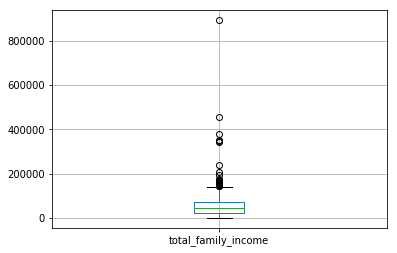

In [166]:
#This cell is plot for the numerical data to see if the outlier should be remove or not 

census_income_boxplot = newCensus.boxplot(column = ['total_family_income'])
census_income_boxplot

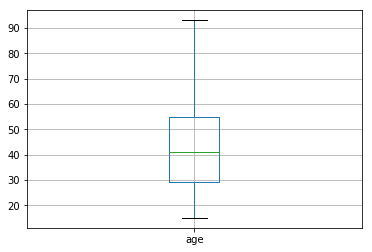

In [167]:
census_age_boxplot =newCensus.boxplot(column = ['age'])
census_age_boxplot

# Remove outliers

From the above boxplots, we need to remove outliers for total family income.

In this case, I apply the the median and interquartile range method.

In [168]:
# create syntactical sugar 

census_family_income = newCensus["total_family_income"]

family_income_median = census_family_income.median()
family_income_iqr = census_family_income.quantile(0.75) - census_family_income.quantile(0.25)

print family_income_median

print family_income_iqr

# count  total  number  of  outlier we have

print len(newCensus[ census_family_income > family_income_median+1.5*family_income_iqr])
print len(newCensus[ census_family_income < family_income_median-1.5*family_income_iqr])

#drop these outliers

census_median_outlier_drop = newCensus.drop(
    newCensus.index[
        (census_family_income > family_income_median+1.5*family_income_iqr) | 
        (census_family_income < family_income_median-1.5*family_income_iqr)
    ]
)

census_eda = census_median_outlier_drop

census_eda.head()

44000.0
48000.0
35
0


census_year state_fips_code  total_family_income  age     sex  \
0         2000         Florida              14550.0   44    Male   
1         2000         Florida              22800.0   20  Female   
2         2000         Florida                  0.0   20    Male   
4         2000         Florida              48000.0   55    Male   
5         2000         Florida              74000.0   43  Female   

      race_general          marital_status  total_personal_income  
0  Two major races  Married/spouse present                    0.0  
1            White    Never married/single                13000.0  
2            Black    Never married/single                20000.0  
4            White  Married/spouse present                36000.0  
5            White  Married/spouse present                27000.0

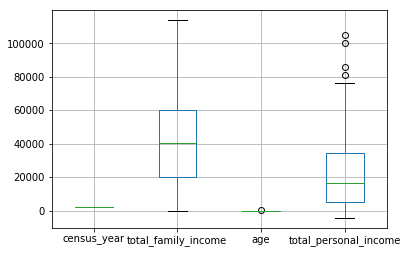

In [169]:
census_eda.boxplot()

In [327]:
#This cell creates dataframe and variables for the first research question

#(a) Does California have a higher median family income than Texas?
family_income_state_df = pd.DataFrame(
    census_eda, 
    columns=[
        'state_fips_code','total_family_income'
    ]
)

CA_df = family_income_state_df[(family_income_state_df['state_fips_code'] == 'California')]

TX_df = family_income_state_df[(family_income_state_df['state_fips_code'] == 'Texas')]

CA_family_income = CA_df["total_family_income"]

TX_family_income = TX_df["total_family_income"]

In [326]:
#This cell creates dataframe and variables for the second research question

#Is the proportion of families that earn less than $15,000 greater than the proportion of familes 
#that make above $100,000

family_income_df =pd.DataFrame(
    census_eda, 
    columns=[
        'total_family_income'
    ]
)

low_family_income = family_income_df[family_income_df['total_family_income'] < 15000]

high_family_income = family_income_df[family_income_df['total_family_income'] > 100000]

In [328]:
#This cell creates dataframe and variables for the third and fourth research question

#(c) Are Florida residents olders on average than New York residents?

#(d) Is the standard deviation of age in Florida different than that of New York?

age_by_state_df = pd.DataFrame(
    census_eda, 
    columns=[
        'state_fips_code','age'
    ]
)

FL_df = age_by_state_df[(age_by_state_df['state_fips_code'] == 'Florida')]

NY_df = age_by_state_df[(age_by_state_df['state_fips_code'] == 'New York')]

FL_age = FL_df["age"]

NY_age = FL_df["age"]

# Task 3: Exploratory Data Analysis

For each of the four dataframes, perform an exploratory data analysis

## EDA for the first question

In [173]:
# This cell finds the mean, standard deviation, and median for the California family income dataframe

CA_df.describe()

total_family_income
count            41.000000
mean          52150.975610
std           30719.275773
min               0.000000
25%           30500.000000
50%           52000.000000
75%           77700.000000
max          113710.000000

In [174]:
# This cell finds IQR for the California family income dataframe

CA_df_iqr = CA_df.quantile(0.75)-CA_df.quantile(0.25)

CA_df_iqr

total_family_income    47200.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000109DE588>]],
      dtype=object)

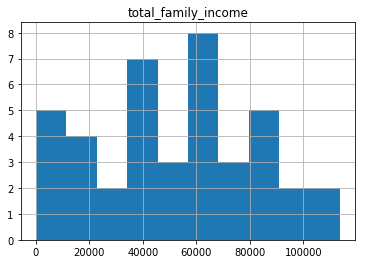

In [175]:
# This cell draws the histograms for the California family income dataframe

CA_df.hist()

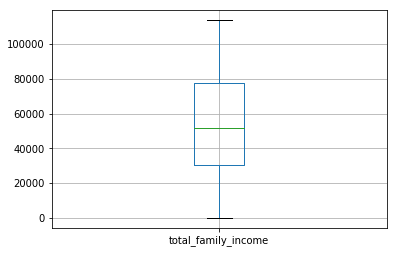

In [176]:
# This cell draws the boxplot for the California family income dataframe

CA_df.boxplot(column = 'total_family_income')

In [177]:
# This cell computes the skew of the California family income dataframe

CA_df['total_family_income'].skew()

0.11921788936071169

In [178]:
# This cell finds the mean, standard deviation, and median for the Texas family income dataframe

TX_df.describe()

total_family_income
count            22.000000
mean          36003.636364
std           19237.516805
min               0.000000
25%           21150.000000
50%           39025.000000
75%           50757.500000
max           63600.000000

In [179]:
# This cell finds IQR for the Texas family income dataframe

TX_df_iqr = TX_df.quantile(0.75)-TX_df.quantile(0.25)

TX_df_iqr

total_family_income    29607.5
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F6AA048>]],
      dtype=object)

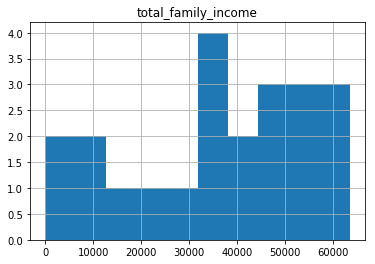

In [180]:
# This cell draws the histograms for the Texas family income dataframe

TX_df.hist()

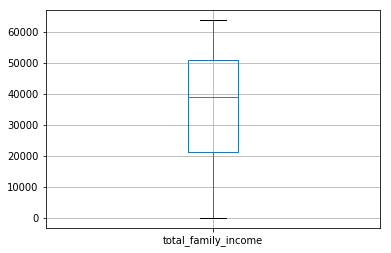

In [181]:
# This cell draws the boxplot for the Texas family income dataframe

TX_df.boxplot(column = 'total_family_income')

In [182]:
# This cell computes the skew of the Texas family income dataframe

TX_df['total_family_income'].skew()

-0.45534989413263705

# EDA for the second question

In [329]:
# This cell finds the mean, standard deviation, and median for all family income dataframe

family_income_df.describe()

total_family_income
count           342.000000
mean          42458.526316
std           27809.426301
min               0.000000
25%           20090.000000
50%           40350.000000
75%           60000.000000
max          113710.000000

In [330]:
# This cell finds IQR for all family income dataframe

family_income_df_iqr =family_income_df.quantile(0.75)-family_income_df.quantile(0.25)

family_income_df_iqr

total_family_income    39910.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013DA4EB8>]],
      dtype=object)

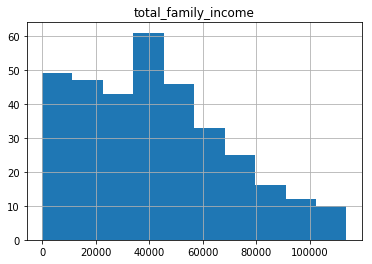

In [331]:
# This cell draws the histograms for all family income dataframe

family_income_df.hist()

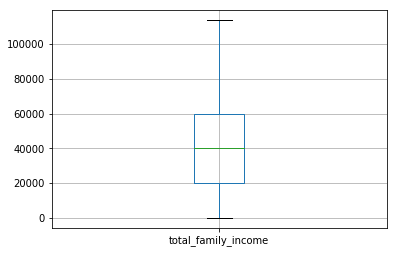

In [332]:
# This cell draws the boxplot for all family income dataframe

family_income_df.boxplot(column = 'total_family_income')

In [333]:
# This cell computes the skew of all family income dataframe

family_income_df['total_family_income'].skew()

0.492895194758172

# EDA for the third and fourth question

In [188]:
# This cell finds the mean, standard deviation, and median for the Florida ages dataframe

FL_df.describe()

age
count  31.000000
mean   45.096774
std    17.760170
min    17.000000
25%    29.500000
50%    47.000000
75%    58.000000
max    80.000000

In [189]:
# This cell finds IQR for the Florida ages dataframe

FL_df_iqr =FL_df.quantile(0.75)-FL_df.quantile(0.25)

FL_df_iqr

age    28.5
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000101B42E8>]],
      dtype=object)

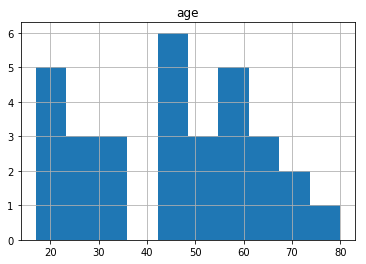

In [190]:
# This cell draws the histograms for the Florida ages dataframe

FL_df.hist()

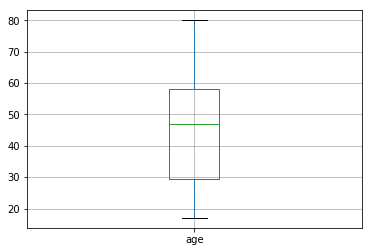

In [191]:
# This cell draws the boxplot for the Florida ages dataframe

FL_df.boxplot(column = 'age')

In [192]:
# This cell computes the skew of the Florida ages dataframe

FL_df['age'].skew()

-0.06378622662091497

In [193]:
# This cell finds the mean, standard deviation, and median for the New York ages dataframe

NY_df.describe()

age
count  25.000000
mean   40.440000
std    20.860809
min    16.000000
25%    24.000000
50%    36.000000
75%    47.000000
max    83.000000

In [194]:
# This cell finds IQR for the New York ages dataframe

NY_df_iqr =NY_df.quantile(0.75)-FL_df.quantile(0.25)

NY_df_iqr

age    17.5
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011309B00>]],
      dtype=object)

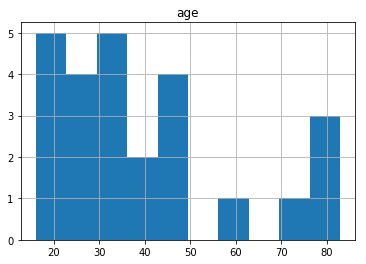

In [195]:
# This cell draws the histograms for the New York ages dataframe

NY_df.hist()

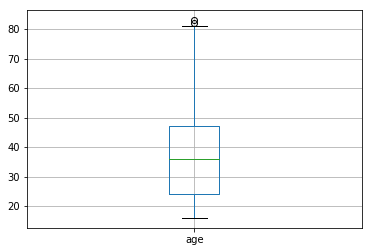

In [196]:
# This cell draws the boxplot for the New York ages dataframe

NY_df.boxplot(column = 'age')

In [197]:
# This cell computes the skew of the New York ages dataframe

NY_df['age'].skew()

0.9113808497522984

# define a correlation matrix, gethers the correlation between all numerical variables

In [198]:
census_corr_matrix = census_eda.corr()

print census_corr_matrix

                       census_year  total_family_income       age  \
census_year                    NaN                  NaN       NaN   
total_family_income            NaN             1.000000 -0.097728   
age                            NaN            -0.097728  1.000000   
total_personal_income          NaN             0.492232  0.120677   

                       total_personal_income  
census_year                              NaN  
total_family_income                 0.492232  
age                                 0.120677  
total_personal_income               1.000000  


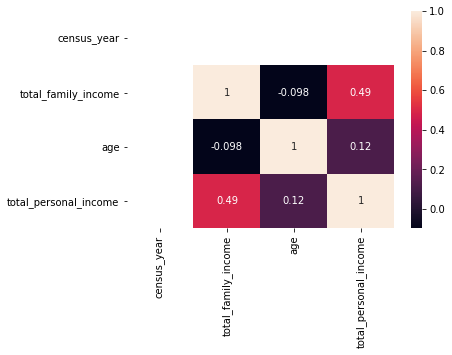

In [199]:
#plot a correlation heay map

sns.heatmap(
    census_corr_matrix,
    xticklabels = census_corr_matrix.columns,
    yticklabels = census_corr_matrix.columns,
    annot=True
)

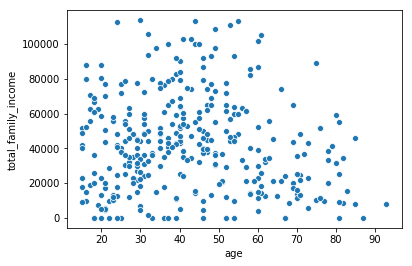

In [200]:
#This cell draws the scatterplot for the age and total family income 

sns.scatterplot(data=census_eda, x='age',y='total_family_income')

plt.show()

# Task 4: Create a bootstrapping algorithm

In [304]:
# This cell creates the bootstrapping algorithm for question (a)
def median_bootstrap(sample_data1,sample_data2,number_of_resamples):
    x=[0]*number_of_resamples #initializes an array

    for i in range(number_of_resamples):
        resample1 = [sample_data1[j]
            for j
            in np.random.randint(len(sample_data1),size=len(sample_data1))
            ]
        resample2 = [sample_data2[k]
            for k
            in np.random.randint(len(sample_data2),size=len(sample_data2))
            ]
        x[i] = np.median(resample1)-np.median(resample2)
    return x

In [359]:
# This cell creates the bootstrapping algorithm for question (b)

def proportion_bootstrap(sample_data, number_of_resamples):
    
    x=[0]*number_of_resamples #initializes an array
    
    for i in range(number_of_resamples):
        resample1 = [sample_data[j] 
                    for j 
                    in np.random.randint(len(sample_data), size=len(sample_data))
                    if sample_data[j]<15000]
        resample2 = [sample_data[k] 
                    for k 
                    in np.random.randint(len(sample_data), size=len(sample_data))
                    if sample_data[k]>100000]
        p15=float(len(resample1))/len(sample_data)
        p100=float(len(resample2))/len(sample_data)
        x[i] = p15-p100
    return x

In [317]:
# This cell creates the bootstrapping algorithm for question (c)

def mean_bootstrap(sample_data1,sample_data2, number_of_resamples):
    x=[0]*number_of_resamples #initializes an array
    for i in range(number_of_resamples):
        resample1 = [sample_data1[j]
            for j
            in np.random.randint(len(sample_data1),size=len(sample_data1))
            ]
        resample2 = [sample_data2[k]
            for k
            in np.random.randint(len(sample_data2),size=len(sample_data2))
            ]
        x[i] = np.mean(resample1)-np.mean(resample2)
    return x

In [320]:
# This cell creates the bootstrapping algorithm for question (d)

def std_bootstrap(sample_data1,sample_data2,number_of_resamples):
    x=[0]*number_of_resamples #initializes an array
    for i in range(number_of_resamples):
        sample1 = [sample_data1[j]
            for j
            in np.random.randint(len(sample_data1),size=len(sample_data1))
            ]
        sample2 = [sample_data2[k]
            for k
            in np.random.randint(len(sample_data2),size=len(sample_data2))
            ]
        x[i] = np.std(sample1)-np.std(sample2)
    return x

# Task 5: Apply the bootstrapping algorithm. 

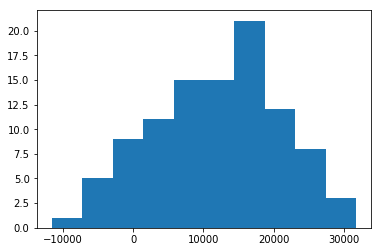

In [316]:
# This cell applys the bootstrapping algorithm for question (a)

median_diff = median_bootstrap(CA_df["total_family_income"].tolist(), 
                               TX_df["total_family_income"].tolist(), 100)


plt.hist(median_diff)
plt.show()

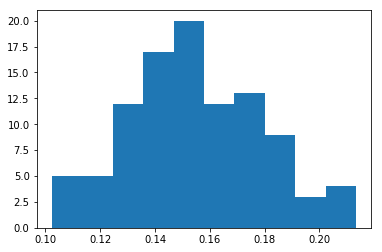

In [360]:
# This cell applys the bootstrapping algorithm for question (b)

proportion_diff = proportion_bootstrap(census_eda['total_family_income'].tolist(),100)

plt.hist(proportion_diff)
plt.show()

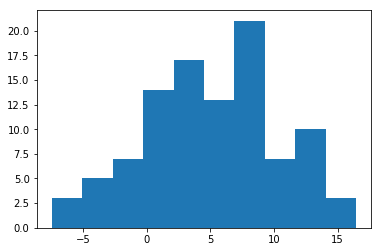

In [319]:
# This cell applys the bootstrapping algorithm for question (c)

mean_diff = mean_bootstrap(FL_df["age"].tolist(), NY_df["age"].tolist(),100)

plt.hist(mean_diff)
plt.show()

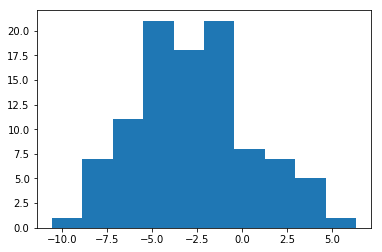

In [323]:
# This cell applys the bootstrapping algorithm for question (d)

std_diff = std_bootstrap(FL_df["age"].tolist(), NY_df["age"].tolist(),100)

plt.hist(std_diff)
plt.show()

# Task 6. The confidence intervals

# (a) Does California have a higher median family income than Texas?

In [365]:
# This cell applys a 95% confidence intervals for question (a)

ci_a = [np.percentile(median_diff,2.5), np.percentile(median_diff,97.5)]

ci_a

[-4721.875, 27362.249999999993]

(a) Does California have a higher median family income than Texas?

California does not have a higher median family income than Texas. Since the econfidence interval contains 0, then we say there is not a statitically significant difference between the two quantities we’re comparing. 

## (b) Is the proportion of families that earn less than 15,000 greater than than the proportion of familes that make above 100,000?

In [364]:
# This cell applys a 95% confidence intervals for question (b)

ci_b = [np.percentile(proportion_diff,2.5), np.percentile(proportion_diff,97.5)]

ci_b

[0.1080409356725146, 0.2046783625730994]

(b) Is the proportion of families that earn less than \\$15,000 greater than than the proportion of familes that make above $100,000?

The proportion of families that earn less than \\$15,000 is greater than than the proportion of familes that make above $100,000.
Since the confidence interval is fully positive, then there is a statstically significant difference between the two quantities and the first quantity is larger.

# (c) Are Florida residents olders on average than New York residents?

In [363]:
# This cell applys a 95% confidence intervals for question (c)

ci_c = [np.percentile(mean_diff,2.5), np.percentile(mean_diff,97.5)]

ci_c

[-5.1788387096774215, 14.055709677419355]

(c) Are Florida residents olders on average than New York residents?

Florida residents are not olders on average than New York residents. Since the econfidence interval contains 0, then we say there is not a statitically significant difference between the two quantities we’re comparing.

# (d) Is the standard deviation of age in Florida different than that of New York?

In [362]:
# This cell applys a 95% confidence intervals for question (d)

ci_d = [np.percentile(std_diff,2.5), np.percentile(std_diff,97.5)]

ci_d

[-7.989046804768419, 3.7346028399157234]

(d) Is the standard deviation of age in Florida different than that of New York

The standard deviation of age in Florida is not different than that of New York. Since the econfidence interval contains 0, then we say there is not a statitically significant difference between the two quantities we’re comparing.